In [2]:
# Find line depths of Specta.

In [8]:
from mingle.utilities.phoenix_utils import load_starfish_spectrum
import matplotlib.pyplot as plt

In [30]:
# Find the minima of the lines.
import numpy as np
from scipy.signal import argrelextrema

x = np.random.random(12)

# for local maxima
argrelextrema(x, np.greater)

# for local minima
argrelextrema(x, np.less)

(array([1, 4, 6, 9]),)

In [95]:
def line_depth(params, limits=(2110, 2160)):
    # params =  [teff, logg, fe/h] for the starfish models.
    spectrum = load_starfish_spectrum(params, limits=limits, hdr=True, normalize=True, area_scale=True,
                                    flux_rescale=True, wav_scale=True)
    
    minima_loc = argrelextrema(spectrum.flux, np.less)
    minima = spectrum.flux[minima_loc]
    # print("number minimua", len(minima))
    print("Parameters = ", params)
    deep_minima = minima[minima < 0.99]
    nlines = len(deep_minima)
    avg_depth = np.mean(deep_minima)
    median_depth = np.median(deep_minima)
    print("Line deph > 2%")
    print("nlines", nlines)
    print("average depth", avg_depth) 

    deeper_minima = minima[minima < 0.95]
    nlines_5 = len(deeper_minima)
    avg_depth_5 = np.mean(deeper_minima)
    median_depth_5 = np.median(deeper_minima)
    print("Line deph >5%")
    print("nlines", nlines_5 )
    print("average depth", avg_depth_5) 
    print()

    # lines, average depth 
    #plt.hist(spectrum.flux[spectrum.flux < 0.99], 20)
    #plt.show()
    #plt.hist(deep_minima, 20)
    #plt.show()
    
    return nlines, avg_depth, median_depth

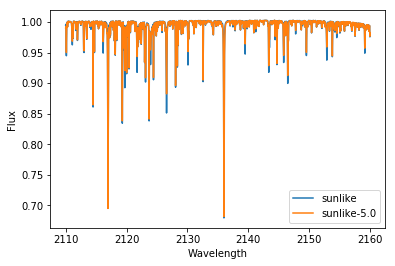

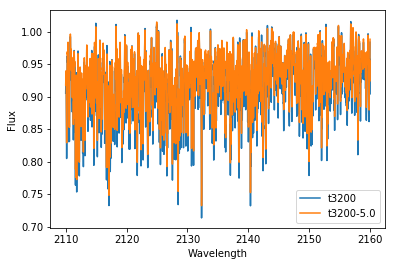

In [96]:
lim = [2110, 2160]
params = [5800, 4.5, 0.0]
sunlike = load_starfish_spectrum(params, limits=lim, hdr=True, normalize=True, area_scale=True,
                                    flux_rescale=True, wav_scale=True)

sunlike5 = load_starfish_spectrum([5800, 5, 0.0], limits=lim, hdr=True, normalize=True, area_scale=True,
                                    flux_rescale=True, wav_scale=True)

t3200 = load_starfish_spectrum([3200, 4.5, 0.0], limits=lim, hdr=True, normalize=True, area_scale=True,
                                    flux_rescale=True, wav_scale=True)
t3200_5 = load_starfish_spectrum([3200, 5, 0.0], limits=lim, hdr=True, normalize=True, area_scale=True,
                                    flux_rescale=True, wav_scale=True)


sunlike.plot(label="sunlike")
sunlike5.plot(label="sunlike-5.0")
plt.legend()
plt.show()

t3200.plot(label="t3200")
t3200_5.plot(label="t3200-5.0")
plt.legend()
plt.show()

In [97]:
line_depth([5800, 4.5, 0])
line_depth([5800, 5, 0])
line_depth([3200, 4.5, 0])
line_depth([3200, 5, 0])
line_depth([2300, 4.5, 0])
line_depth([2300, 5, 0])


Parameters =  [5800, 4.5, 0]
Line deph > 2%
nlines 111
average depth 0.9577685786359189
Line deph >5%
nlines 31
average depth 0.9009764486299107

Parameters =  [5800, 5, 0]
Line deph > 2%
nlines 105
average depth 0.9595706441566679
Line deph >5%
nlines 22
average depth 0.8909980541667637

Parameters =  [3200, 4.5, 0]
Line deph > 2%
nlines 444
average depth 0.8818845915914867
Line deph >5%
nlines 413
average depth 0.8757658975733399

Parameters =  [3200, 5, 0]
Line deph > 2%
nlines 414
average depth 0.8967968433628042
Line deph >5%
nlines 365
average depth 0.8880523074183325

Parameters =  [2300, 4.5, 0]
Line deph > 2%
nlines 463
average depth 0.7664636212466568
Line deph >5%
nlines 463
average depth 0.7664636212466568

Parameters =  [2300, 5, 0]
Line deph > 2%
nlines 470
average depth 0.80156412675351
Line deph >5%
nlines 464
average depth 0.799610437674791



(470, 0.80156412675351, 0.8112588519036434)